# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Separate the variables N and t 

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial decomposition of terms in LHS gives us 

$\frac{1}{N(1-\frac{N}{K})} = \frac{k}{N \times (K-N)} = \frac{1}{N} + \frac{1}{K-N}$

The new equation is 

$\frac{dN}{N} + \frac{dN}{K-N} = r \times dt$

$\int \frac{dN}{N} + \frac{dN}{K-N} = \int r \times dt$

$\ln{|N|} - \ln{|K-N|} = rt + C$

$\ln{\frac{|K-N|}{|N|}} = -rt - C$

$\frac{|K-N|}{|N|} = e^{-rt - C}$

$\frac{K-N}{N} = A \times e^{-rt}$

$N = \frac{K}{1 - A \times e^{-rt}}$ where $A = \frac{K - No}{No}$



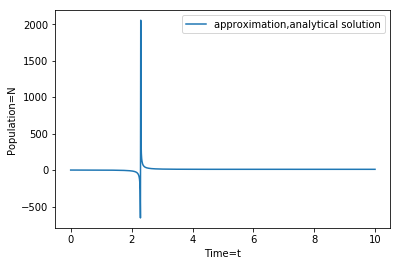

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (K-No)/No
N = K/(1-(A*np.exp(-1*r*t)))
# t is an array, it is the same as doing it for each element
plt.plot(t, N)
plt.legend(['approximation,analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()

### Part 2

Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

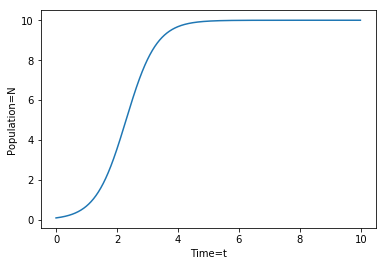

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
def f(N, t, r, K):
    """Derivative functiion"""    
    return r*N*(1-N/K)

# The order of the arguments for ode function: the derivative function, the initial condition, the points where we want 
# the solution, and a list of parameters
N = odeint(f, No, t, (r, K))

# plot the solution
plt.plot(t, N)
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()


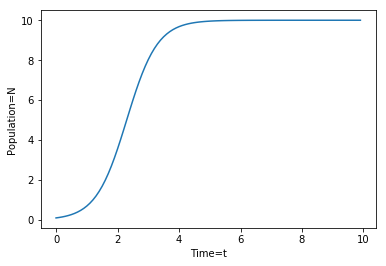

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.1)
# parameters
r = 2
K = 10
# initial condition
No = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
def f(N, t, r, K):
    """Derivative functiion"""    
    return r*N*(1-N/K)

# The order of the arguments for ode function: the derivative function, the initial condition, the points where we want 
# the solution, and a list of parameters
N = odeint(f, No, t, (r, K))

# plot the solution
plt.plot(t, N)
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()


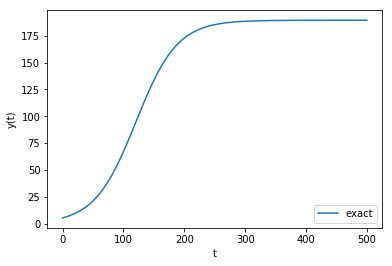

In [21]:
#Eulers method - another way to obtain numerical solution 

from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

# limits: 0.0 <= t <= 150
a = 0
b = 500
# Number of steps
nsteps = 1000
# Carrying capacity
K = 189.4
# Growth rate
r = 0.029443
# step-size
h = (b-a)/nsteps

# initial value: y(0.0) = 0.5
initial = (0.0,5.3)

# Logistic growth rate differential equation
def f(N,K,r):
    return r*N*(1-(N/K))
 
# Create arrays to hold values of t and N
t = np.arange(a,b+h,h)
narray = np.zeros((nsteps+1,))
 
# set the initial values
t[0], narray[0] = initial
 
# Apply Euler's method
for i in range(1,nsteps+1):
    narray[i] = narray[i-1] + h*f(narray[i-1], K, r)
    
# Exact solution
def y(t):
    return K / (1 + (((K-5.3)/5.3)*np.exp(-r*t)))

plt.plot(t, y(t), label='exact')
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.show()
plt.savefig( 'euler_example.png', fmt='PNG', dpi=100 )

## Task 2

3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ)

For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, there is a system of three differential equations:

$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$